<a href="https://colab.research.google.com/github/HsuLiSheng/big-data/blob/main/6_%E8%82%A1%E7%A5%A8%E5%80%8B%E8%82%A1%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import matplotlib as mpl
import matplotlib.font_manager as fm

###選擇下載翰字鑄造的台北黑體
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
###也可以從文件夾符號中的最左邊上傳其他中文字型

###加入到matplotlib的字型家族中
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

###可觀察有沒有加入成功
#[f.name for f in fm.fontManager.ttflist]

--2022-11-14 12:16:35--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.197.101, 173.194.197.139, 173.194.197.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.197.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b5415kl5918erav0ncgsmvrt29ofrag2/1668428175000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=5766f534-96c4-48cf-8a3c-3db6f6ea6d33 [following]
--2022-11-14 12:16:35--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b5415kl5918erav0ncgsmvrt29ofrag2/1668428175000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=5766f534-96c4-48cf-8a3c-3db6f6ea6d33
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 64.233.183.132, 2607:f8b0:4001:c0b::84
Connecting to do

In [8]:
import requests
import json, csv
import pandas as pd
import os
import time
from plotly.offline import plot, iplot
from plotly.graph_objs import Scatter, Layout, Figure

###plotly版本>4後，不用離線連線，用Figure就能plot
#plotly.offline.init_notebook_mode(connected=True)

###取消顯示pandas資料重設警告(在更改pandas資料值的時候)
pd.options.mode.chained_assignment = None

def convertdate(date):
  str1 = str(date)
  year = str1[:3]
  realyear = str(int(year) + 1911)
  realdate = realyear + str1[4:6] + str1[7:9]
  return realdate

def todigit(num):
  if (num<10):
    res = '0' + str(num)
  else:
    res = str(num)
  return res    

In [ ]:
###
###下載個股單月統計圖
###

In [17]:
filepath = '/content/drive/MyDrive/Colab Notebooks/big data sample/stock/stockmonth01.csv'

###如果檔案不存在就建立檔案
if not os.path.isfile(filepath):
  url = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20210101&stockNo=2498&_=1668410157203'
  res = requests.get(url)
  ###利用json解析回傳的資料
  jsondata = json.loads(res.text)

  ###開啟儲存檔案
  output = open(filepath, 'w', newline='', encoding='utf-8-sig')
  ###以csv方式寫入檔案
  outputw = csv.writer(output)
  ###寫入資料的標題
  outputw.writerow(jsondata['fields'])
  ###寫入每天的資料
  for dataline in (jsondata['data']):
    outputw.writerow(dataline)
  ###關閉檔案
  output.close()

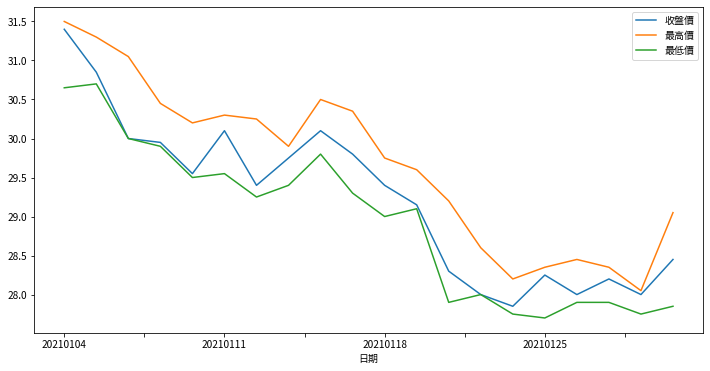

In [19]:
###以pandas讀取檔案
data = pd.read_csv(filepath, encoding='utf-8-sig')

###把國曆日期轉成西元日期(符合後續轉成datetime形式)
for i in range(len(data['日期'])):
  data['日期'][i] = convertdate(data['日期'][i])

###轉換日期欄位為日期格式
data['日期'][i]  = pd.to_datetime(data['日期'][i] ) 

###
###因為matplolib的問題沒辦法顯示中文標題->改成英文 (解決辦法:下載中文字體加入到matplotlib中)
#data = data.rename(columns={'日期':'Date', '收盤價':'Close', '最高價':'High', '最低價':'Low'})
###設定為線形圖，圖片的長度和寬度
#data.plot(kind='line', figsize=(12,6), x='Date', y=['Close', 'High', 'Low'])


data.plot(kind='line', figsize=(12,6), x='日期', y=['收盤價', '最高價', '最低價'])

In [ ]:
###
###下載個股全年統計圖
###

In [20]:
urlhead = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=2021'
urltail = '01&stockNo=2498&_=1668410157203'

filepath = '/content/drive/MyDrive/Colab Notebooks/big data sample/stock/stock2021.csv'

if not os.path.isfile(filepath):
  for i in range(1,13):
    url = urlhead + todigit(i) + urltail
    res = requests.get(url)
    jsondata = json.loads(res.text)
    
    ###'a':寫入資料時是將資料附加到檔案中
    output = open(filepath, 'a', newline='', encoding='utf-8-sig')
    outputw = csv.writer(output)
    ###第一個月要把欄位名稱寫入
    if i==1:
      outputw.writerow(jsondata['fields'])
    for dataline in (jsondata['data']):
      outputw.writerow(dataline)
    
    time.sleep(1)  
  output.close()

In [22]:
data = pd.read_csv(filepath, encoding='utf-8-sig')

###下載的時候110/02/01的日期有標頭代碼，會多佔一個字元(直接手動處理)
data['日期'][20] = '110/02/01'

for i in range(len(data['日期'])):
  data['日期'][i] = convertdate(data['日期'][i])

data['日期'][i]  = pd.to_datetime(data['日期'][i] ) 

figure_style = '中文'

if figure_style == '英文':
  data = data.rename(columns={'日期':'Date', '收盤價':'Close', '最高價':'High', '最低價':'Low'})
  plotdata = [
         Scatter(x=data['Date'], y=data['Close'], name='Close'),
         Scatter(x=data['Date'], y=data['High'], name='High'),
         Scatter(x=data['Date'], y=data['Low'], name='Low'),]
elif figure_style == '中文':
  plotdata = [
         Scatter(x=data['日期'], y=data['收盤價'], name='收盤價'),
         Scatter(x=data['日期'], y=data['最高價'], name='最高價'),
         Scatter(x=data['日期'], y=data['最低價'], name='最低價'),]

fig = Figure(data=plotdata)

###給標題，標題位置由title_x或y控制:左到右(0~1)、下到上(0~1)
#fig.update_layout(title_text='2021stock of 2498',title_x=0.5)
fig.update_layout(title_text='2498(宏達電)2021年份的股價波動',title_x=0.5)

fig.show()